In [3]:
!pip install d2l


     |████████████████████████████████| 83 kB 1.2 MB/s 


## concise implementation of softmax regression with pytorch


In [4]:
import torch
from torch import nn
from d2l import torch as d2l

In [9]:
# loading data
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
train_iter.dataset.class_to_idx

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

## Initialize model parametes


In [17]:
input_size = 28*28  # 784 
hidden_size = 10
# PyTorch does not implicitly reshape the inputs. Thus we define the flatten
# layer to reshape the inputs before the linear layer in our network

net = nn.Sequential(nn.Flatten(), nn.Linear(input_size, hidden_size))    # XW+b

def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.normal_(m.weight, std = 0.01)

net.apply(init_weights)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [18]:
# loss 
loss = nn.CrossEntropyLoss()


In [27]:
# use minibatch gradient descent and a learning rate 0.1
trainer = torch.optim.SGD(net.parameters(), lr = 0.1)

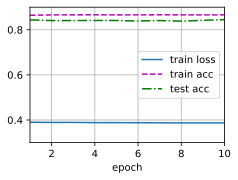

In [28]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)